In [1]:
#Alias to dataset - dts
import opendatasets as od

In [2]:
#URL address to dts
od.download("https://www.kaggle.com/benhamner/sf-bay-area-bike-share")

Skipping, found downloaded files in ".\sf-bay-area-bike-share" (use force=True to force download)


In [3]:
# Importa os pacotes que serão utilizados
import re
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
# Conecta ao banco de dados
conn = sqlite3.connect('sf-bay-area-bike-share/database.sqlite')

In [5]:
# Extrai a lista de tabelas
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [6]:
# Visualiza o resultado
tabelas.head()

,Table_Name
0,station
1,status
2,trip
3,weather


In [7]:
# Cria a consulta SQL
consulta1 = 'SELECT * FROM station LIMIT 15'

In [8]:
# Extrai o resultado
resultado1 = pd.read_sql_query(consulta1, conn)

In [9]:
# Visualiza o resultado
display(resultado1)

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,8/7/2013
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,8/5/2013
7,9,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
9,11,MLK Library,37.335885,-121.885660,19,San Jose,8/6/2013


In [10]:
# Cria a consulta SQL
consulta2 = 'SELECT * FROM status LIMIT 5'

In [11]:
# Extrai o resultado
resultado2 = pd.read_sql_query(consulta2, conn)

In [12]:
# Visualiza o resultado
display(resultado2)

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01


In [13]:
# Cria a consulta SQL
consulta3 = 'SELECT * FROM trip LIMIT 5'

In [14]:
# Extrai o resultado
resultado3 = pd.read_sql_query(consulta3, conn)

In [15]:
# Visualiza o resultado
display(resultado3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4069,174,8/29/2013 9:08,2nd at South Park,64,8/29/2013 9:11,2nd at South Park,64,288,Subscriber,94114
1,4073,1067,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:42,San Francisco Caltrain 2 (330 Townsend),69,321,Subscriber,94703
2,4074,1131,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,317,Subscriber,94115
3,4075,1117,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,316,Subscriber,94122
4,4076,1118,8/29/2013 9:25,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,322,Subscriber,94597


In [16]:
# Cria a consulta SQL
consulta4 = 'SELECT * FROM weather LIMIT 5'

In [17]:
# Extrai o resultado
resultado4 = pd.read_sql_query(consulta4, conn)

In [18]:
# Visualiza o resultado
display(resultado4)

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74,68,61,61,58,56,93,75,57,...,10,10,23,11,28,0,4,,286,94107
1,8/30/2013,78,69,60,61,58,56,90,70,50,...,10,7,29,13,35,0,2,,291,94107
2,8/31/2013,71,64,57,57,56,54,93,75,57,...,10,10,26,15,31,0,4,,284,94107
3,9/1/2013,74,66,58,60,56,53,87,68,49,...,10,10,25,13,29,0,4,,284,94107
4,9/2/2013,75,69,62,61,60,58,93,77,61,...,10,6,23,12,30,0,6,,277,94107


## Análise da distribuição de bikes por cidade do estado de San Francisco:

In [19]:
# Cria a consulta SQL
consulta5 = 'SELECT city, SUM(dock_count) AS Qtd_bikes FROM station GROUP BY city ORDER BY Qtd_bikes ASC'

In [20]:
# Extrai o resultado
resultado5 = pd.read_sql_query(consulta5, conn)

In [21]:
# Visualiza o resultado
display(resultado5)

,city,Qtd_bikes
0,Palo Alto,75
1,Redwood City,115
2,Mountain View,117
3,San Jose,264
4,San Francisco,665


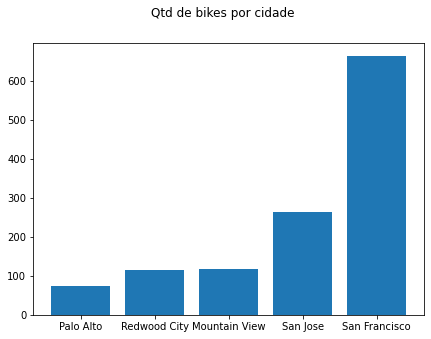

In [22]:
#Cria o gráfico
data = {'Palo Alto': 75, 'Redwood City': 115, 'Mountain View': 117, 'San Jose': 264, 'San Francisco': 665}
names = list(data.keys())
values = list(data.values())


fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(names, values, label='city')
fig.suptitle('Qtd de bikes por cidade')

plt.show()

In [23]:
# Cria a consulta SQL
consulta6 = '''
            SELECT s.city, COUNT(t.id) AS Qtd_viagens FROM 
            trip t INNER JOIN station s ON t.start_station_id= s.id 
            GROUP BY s.city ORDER BY Qtd_viagens ASC
            
            '''

In [24]:
# Extrai o resultado
resultado6 = pd.read_sql_query(consulta6, conn)

In [25]:
# Visualiza o resultado
display(resultado6)

,city,Qtd_viagens
0,Redwood City,3433
1,Palo Alto,6773
2,Mountain View,18167
3,San Jose,37878
4,San Francisco,603708


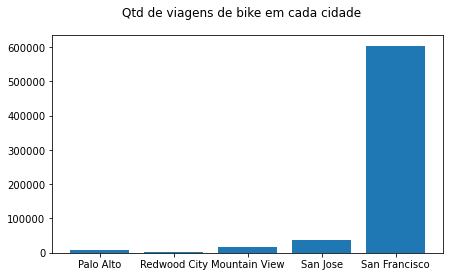

In [26]:
#Cria o gráfico
data = {'Palo Alto': 6773, 'Redwood City': 3433, 'Mountain View': 18167, 'San Jose': 37878, 'San Francisco': 603708}
names = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(names, values, label='city')
fig.suptitle('Qtd de viagens de bike em cada cidade')

plt.show()

Observe pelo gráfico de barras que a quantidade de viagens por bike disponível na cidade de Palo Alto é maior do que em Redwood City, apesar de Redwood City ter mais bikes disponíveis  do que em Palo Alto. Essa diferença sugere que um melhor aproveitamento dos recursos possa ser feito ao levar algumas bikes ou estações de bikes de Redwood City para Palo Alto.

In [27]:
#Cálculo do nível de utilização das bikes
Qtd_bikes = np.array([75, 115, 117, 264, 665])
Qtd_viagens = np.array([6773, 3433, 18167, 37878, 603708])
Utilizacao = Qtd_viagens/Qtd_bikes

print (Utilizacao)

[ 90.30666667  29.85217391 155.27350427 143.47727273 907.83157895]


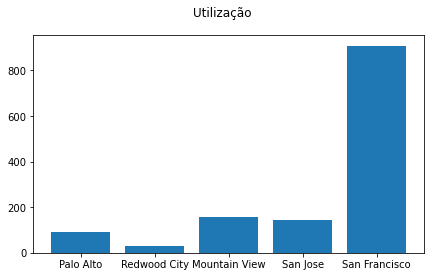

In [28]:
#Cria o gráfico
data = {'Palo Alto': 90.3, 'Redwood City':29.8, 'Mountain View': 155.3, 'San Jose': 143.47 , 'San Francisco': 907.8}
names = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(names, values, label='Utilização')
fig.suptitle('Utilização')

plt.show()

Ao comparar o gráfico de 'Utilização' com o gráfico de 'Qtd de bikes por cidade' repare que as cidades de Moutain View (MV) e Palo Alto (PA) tem utilização maior que San Jose (SJ) e Redwood City (RC) mesmo com menos bikes disponíveis. Isso sugere que a demanda em MV e PA é maior que a demanda em SJ e RC, por isso, deslocar bikes de RC para PA e de SJ para MV pode resultar em melhor aproveitamento do mesmo recurso e possivelmente aumentar a receita gerada.

In [29]:
# Cria a consulta SQL
consulta7 = '''
            SELECT s.city AS Cidade, ROUND(AVG(t.duration/60)) AS Tempo_médio_de_viagem, COUNT(t.id) AS Qtd_viagens  
            FROM trip t INNER JOIN station s ON t.start_station_id= s.id 
            GROUP BY s.city ORDER BY Tempo_médio_de_viagem ASC
            
            '''

In [30]:
# Extrai o resultado
resultado7 = pd.read_sql_query(consulta7, conn)

In [31]:
# Visualiza o resultado
display(resultado7)

,Cidade,Tempo_médio_de_viagem,Qtd_viagens
0,San Francisco,17.0,603708
1,San Jose,23.0,37878
2,Mountain View,29.0,18167
3,Redwood City,40.0,3433
4,Palo Alto,71.0,6773


Ao observarmos a tabela trip nota-se que a unidade de duração da viagem está em segundos, portanto, na tabela acima, temos o tempo médio de viagem em minutos. Note que PA e MV tem tempos médios de viagem maiores que RC e SJ, o que reforça a hipótese de que redistribuir as bikes conforme a sugestão feita sob o gráfico 'Utilização' será saudável para o aumento de receita deste serviço.